### Step 1. Importing libraries and data sets

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import haversine as hs
import os
import datetime
from datetime import date
import folium
import json
import haversine as hs
from IPython.core.display import display, HTML
from collections import Counter

MAGENTA = "#6C3483"
GREEN = "#239B56"
BLUE = "#5DADE2"

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_84095/4072833763.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

In [5]:
# Import the “df_1701_1912.pkl” file into Jupyter as df_1701_1912

df_1701_1912 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_1701_1912.pkl'))

In [7]:
df_2017 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_2017.pkl'))
df_2018 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_2018.pkl'))
df_2019 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_2019.pkl'))

In [5]:
# Import ".json" file for the U.S. as geo_d

geo_d = r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json'

In [ ]:
# View the JSON file contents

f = open(r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

In [6]:
df_1701_1912.dtypes

trip_duration                int64
start_time                  object
stop_time                   object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
birth_year                 float64
gender                       int64
dtype: object

In [7]:
df_1701_1912.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263.0,Cooper Square & E 7 St,40.729236,-73.990868,498.0,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [6]:
# Create a sample of the dataframe - The current size is too large to work on my personal computer so I will create a
# sample 25% the size of the dataframe and work on that.

df_sub = df_1701_1912.sample(frac=0.25, random_state=2)
df_sub.shape

(13616122, 15)

In [7]:
# Change data types

df_sub[['start_time','stop_time']] =  df_sub[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_sub.dropna(inplace=True)

In [8]:
df_2017[['start_time','stop_time']] =  df_2017[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_2017.dropna(inplace=True)
df_2018[['start_time','stop_time']] =  df_2018[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_2018.dropna(inplace=True)
df_2019[['start_time','stop_time']] =  df_2019[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_2019.dropna(inplace=True)

In [9]:
# Split datetime in 'start_date_only' and 'start_time_only' columns

df_2017['start_date_only'] = [d.date() for d in df_2017['start_time']]
df_2017['start_time_only'] = [d.time() for d in df_2017['start_time']]
df_2018['start_date_only'] = [d.date() for d in df_2018['start_time']]
df_2018['start_time_only'] = [d.time() for d in df_2018['start_time']]
df_2019['start_date_only'] = [d.date() for d in df_2019['start_time']]
df_2019['start_time_only'] = [d.time() for d in df_2019['start_time']]
df_2017.head()
df_2018.head()
df_2019.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,start_date_only,start_time_only
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019-01-01,00:01:47.401000
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019-01-01,00:04:43.736000
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019-01-01,00:06:03.997000
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019-01-01,00:07:03.545000
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019-01-01,00:07:35.945000


In [11]:
df_2017 = df_2017
df_2018 = df_2018
df_2019 = df_2019

In [19]:
# Count trips per day in df_2017, df_2018, df_2019. I will export these to excel and normalise the data there

df_2017_counts = df_2017.groupby(df_2017['start_date_only'])['start_date_only'].count()
df_2018_counts = df_2018.groupby(df_2018['start_date_only'])['start_date_only'].count()
df_2019_counts = df_2019.groupby(df_2019['start_date_only'])['start_date_only'].count()

In [21]:
df_2019_counts

start_date_only
2019-01-01    21962
2019-01-02    37797
2019-01-03    41676
2019-01-04    43922
2019-01-05    17432
              ...  
2019-12-27    31808
2019-12-28    28520
2019-12-29    17968
2019-12-30    12138
2019-12-31    31510
Name: start_date_only, Length: 365, dtype: int64

In [10]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13101521 entries, 1352239 to 31150
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trip_duration            int64         
 1   start_time               datetime64[ns]
 2   stop_time                datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  birth_year               float64       
 14  gender                   int64         
dtypes: datetime64[ns](2), float64(7), int64(3), object(3)
memory usage: 1.6+ GB


In [8]:
# Change "trip_duration" column format from seconds to minutes

df_sub["trip_duration"] = df_sub["trip_duration"]/60

In [9]:
# Add hour_of_day based on start_time column

df_sub['hour_of_day'] = df_sub['start_time'].dt.hour

In [10]:
# Replace value in gender '0', 1' and '2' with 'M' and 'F'

df_sub['gender'] = df_sub['gender'].map({2: 'F', 1: 'M', 0: 'N/A'})

In [11]:
# Save changes to column gender

df_sub = df_sub

In [12]:
# Calculate age from birth_year column

df_sub['age'] = df_sub['start_time'].dt.year - df_sub['birth_year']

In [13]:
# Save changes to dataframe

df_sub = df_sub

In [14]:
# Add 'trip_type' column. The mean is 15.612 mins. The 25th percentie is 5.967 mins and the 75th percentile is 17.267
# I used these to define the categories

df_sub['trip_type'] = np.where(df_sub['trip_duration'] < 6, "short trip", np.where(
    (df_sub['trip_duration'] >= 6) & (df_sub['trip_duration'] <= 18), "average trip", np.where(
    (df_sub['trip_duration'] > 18) & (df_sub['trip_duration'] <= 90), "long trip", "extra long trip")))

In [15]:
df_sub['trip_type'].value_counts(dropna = False)

average trip       6743478
short trip         3296384
long trip          3013621
extra long trip      48038
Name: trip_type, dtype: int64

In [16]:
# Add 'age_group' column

df_sub['age_group'] = np.where(df_sub['age'] < 18, '[0, 18]', np.where(
    (df_sub['age'] >= 18) & (df_sub['age'] < 30), '[18, 30]', np.where(
    (df_sub['age'] >= 30) & (df_sub['age'] < 50), '[30, 50]', np.where(
    (df_sub['age'] >= 50) & (df_sub['age'] < 70), '[50, 70]', '[70+]'))))

In [17]:
# Add 'start & end station location' column

df_sub['start_station_location'] = df_sub[['start_station_latitude','start_station_longitude']].values.tolist()
df_sub['end_station_location'] = df_sub[['end_station_latitude', 'end_station_longitude']].values.tolist()

In [18]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_sub.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,hour_of_day,age
count,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000,13101521.000
mean,15.612,1546.722,40.737,-73.983,1538.050,40.737,-73.983,27033.102,1979.509,13.873,38.602
std,200.437,1434.199,0.050,0.073,1433.059,0.035,0.035,6979.986,12.012,4.878,12.003
min,1.017,72.000,0.000,-74.034,72.000,0.000,-74.084,14529.000,1857.000,0.000,16.000
25%,5.967,377.000,40.718,-73.995,376.000,40.718,-73.996,20294.000,1970.000,10.000,29.000
50%,9.983,501.000,40.738,-73.986,499.000,40.737,-73.987,27950.000,1982.000,15.000,36.000
75%,17.267,3235.000,40.757,-73.974,3233.000,40.756,-73.974,32206.000,1989.000,18.000,48.000
max,155671.017,3911.000,45.506,0.000,3911.000,45.506,0.000,42068.000,2003.000,23.000,162.000


/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


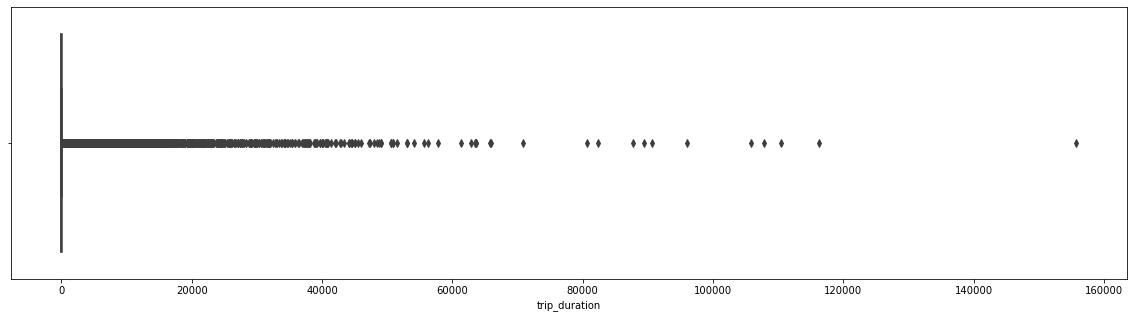

In [22]:
# trip_duration Outlier

plt.figure(figsize = (20,5))
sns.boxplot(df_sub.trip_duration)
plt.show()

### NYC Citi bikes has three pricing oprions. 'Single ride' allows for a 30-minute ride. 'Day pass' allows for unlimited 30-minute rides within a 24-hour period and 'Annual Membership' allows for unlimited 45-minute rides. After the time limit, there is extra charge per minute. It seems unreasonable that riders would pay extra per minute continuously for hours or days.
### Similarly, bike rides that lasted 1-2 minutes are probably situations were a rider undocked and redocked a bike without riding it, or another type of error.

In [23]:
# dataframe with > 180-minute rides

df_long_rides = df_sub[(df_sub['trip_duration'] >  180)]
df_long_rides['trip_duration'].value_counts(dropna = False)

215.783      7
205.033      7
182.633      7
231.600      7
202.150      7
            ..
1053.117     1
51481.783    1
261.917      1
5748.467     1
398.633      1
Name: trip_duration, Length: 14585, dtype: int64

In [24]:
# dataframe with < 2-minute rides

df_short_rides = df_sub[(df_sub['trip_duration'] <  2)]
df_short_rides['trip_duration'].value_counts(dropna = False)

1.983    5994
1.933    5844
1.967    5811
1.950    5758
1.900    5655
1.917    5600
1.867    5423
1.883    5252
1.850    5212
1.833    5187
1.817    5085
1.800    4926
1.750    4855
1.783    4827
1.767    4789
1.733    4682
1.717    4665
1.700    4540
1.683    4517
1.667    4301
1.650    4236
1.617    4227
1.583    4050
1.600    3996
1.633    3986
1.567    3844
1.550    3819
1.517    3726
1.533    3704
1.483    3629
1.500    3602
1.450    3478
1.467    3405
1.433    3322
1.400    3286
1.417    3283
1.383    3148
1.367    3117
1.333    2883
1.350    2868
1.300    2822
1.317    2736
1.283    2684
1.267    2661
1.250    2582
1.233    2517
1.200    2447
1.217    2442
1.183    2393
1.167    2379
1.150    2278
1.133    2177
1.117    2151
1.083    2046
1.100    2022
1.067    2016
1.050    1964
1.033    1906
1.017    1855
Name: trip_duration, dtype: int64

In [19]:
# Delete bike riders < 2 minutes and over 180 minutes. The number of rows is less that 0.0012%,
# so it will not affect our results

df_sub = df_sub[(2 < df_sub['trip_duration']) & (df_sub['trip_duration'] <  180)]

In [26]:
df_sub = df_sub

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


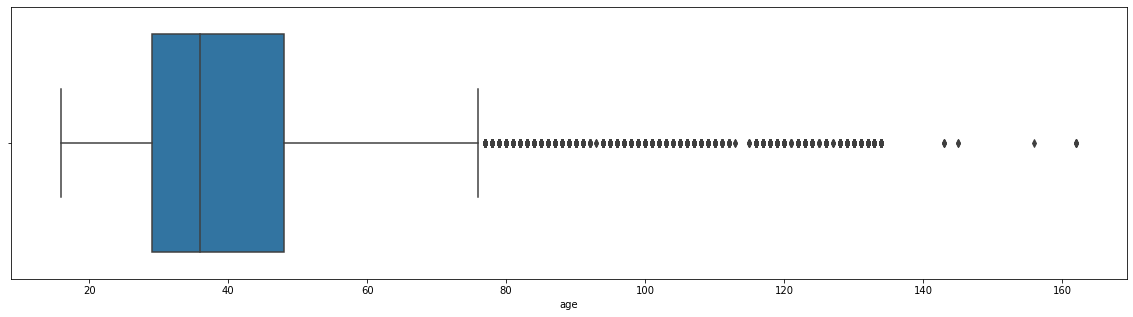

In [27]:
# age Outlier

plt.figure(figsize = (20,5))
sns.boxplot(df_sub.age)
plt.show()

### People having age above 75yrs (approx) are outliers for this dataset or the riders entered their age incorrectly.

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


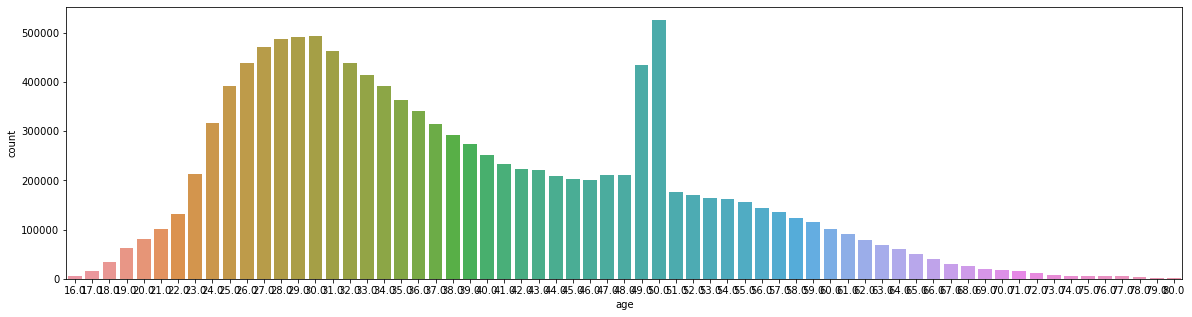

In [31]:
plt.figure(figsize = (20,5))
sns.countplot(df_sub["age"])
plt.show()

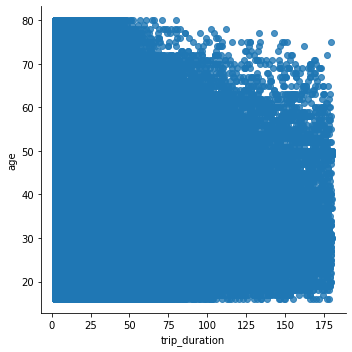

In [32]:
# Create a scatterplot for the "trip_duration" and "age" columns

sns.lmplot(x = 'trip_duration', y = 'age', data = df_sub)

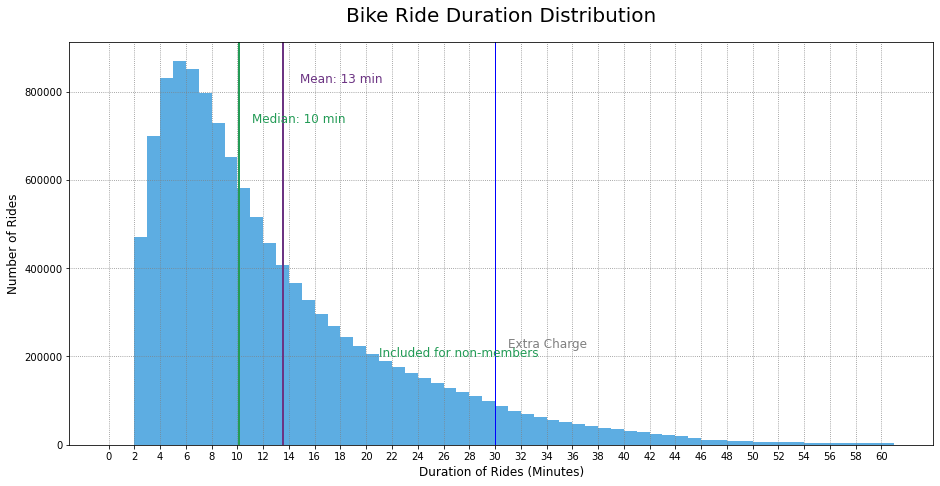

In [33]:
# Bike ride duration distribution

def trip_duration(df):
    
    # df = df_sub.copy()
    
    # Filtering relevant data
    
    duration_data = df['trip_duration']
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Ploting the histogram
    
    plt.hist(duration_data, bins = range(62), color = BLUE, histtype ='bar')

    # Adding median and mean lines
    
    plt.axvline(df['trip_duration'].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
    plt.axvline(df['trip_duration'].median(), color=GREEN, linestyle='-', linewidth=2 )
    plt.axvline(x = 30, color='blue', linestyle='-', linewidth=1 )

    # Adding median and mean texts
    
    min_ylim, max_ylim = plt.ylim()
    plt.text(df['trip_duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} min'.format(df['trip_duration'].mean()), color = MAGENTA,  fontsize= 12)
    plt.text(df['trip_duration'].median()*1.1, max_ylim*0.8, 'Median: {:.0f} min'.format(df['trip_duration'].median()), color = GREEN, fontsize= 12)
    plt.text(x= 21,y=200000, s='Included for non-members', color = GREEN, fontsize= 12)
    plt.text(x= 31,y=220000, s='Extra Charge', color = 'grey', fontsize= 12)

    # Seting ticks on x axis
    
    ticks =range(0, 62, 2)
    plt.xticks(ticks)
    
    # Seting ticks on y axis
    
    ticks =range(0, 3600, 2000)

    # Labeling Axes
    
    ax.set_title('Bike Ride Duration Distribution', fontdict={'fontsize':20}, pad = 20)
    plt.xlabel('Duration of Rides (Minutes)', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)

    # Adding Grid
               
    plt.grid(linestyle=':', color='grey')
    
    plt.show()

trip_duration(df)

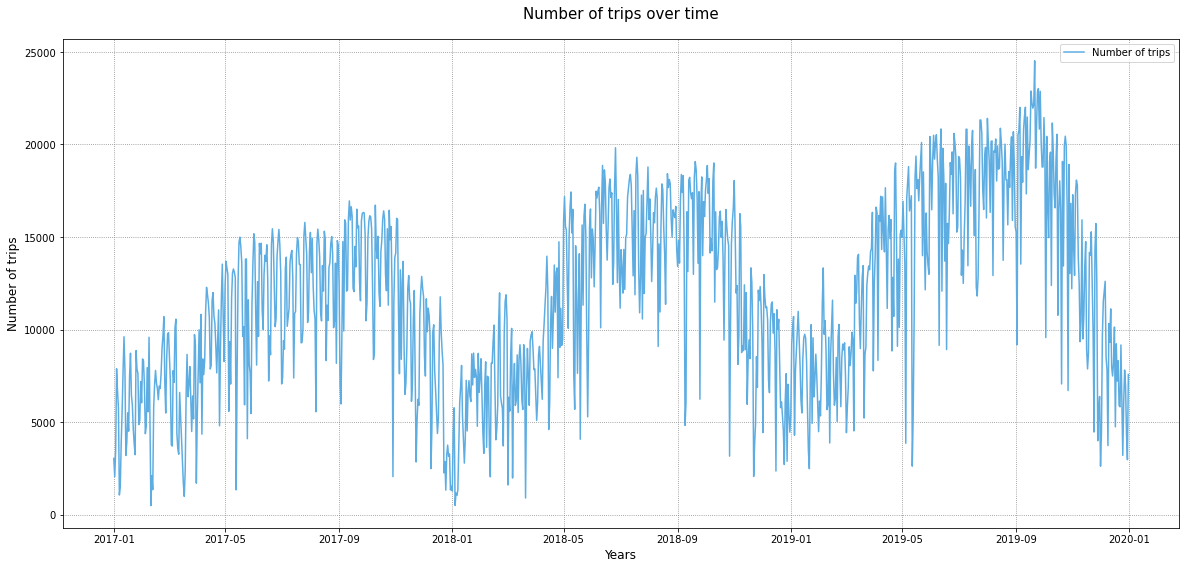

In [28]:
# Usage of bikes per year

def trips_by_year(df_sub):
    
    # Data
    
    df_usage = df_sub.copy()
    df_over_time = df_usage.groupby(df_usage['start_time'].dt.date).size().reset_index(name='count')

    # Figure
    
    fig, ax = plt.subplots(figsize=(20,9))
    plt.plot(df_over_time['start_time'], df_over_time['count'], color= BLUE)

    # Labels
    
    ax.set_title('Number of trips over time', fontsize= 15, pad= 20)
    ax.set_ylabel('Number of trips', fontsize=12)
    ax.set_xlabel('Years', fontsize=12)

    # Grid & Legend
    
    plt.grid(linestyle=':', color='grey')
    plt.legend(['Number of trips'])
    
    plt.show()

trips_by_year(df_sub)

<AxesSubplot:xlabel='hour_of_day', ylabel='Count'>

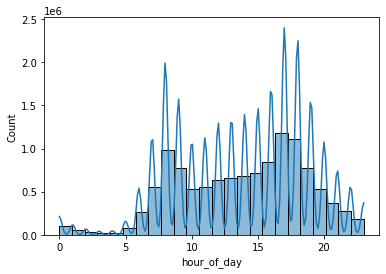

In [35]:
# Create a histogram the "time_of_day" column

sns.histplot(df_sub['hour_of_day'], bins = 24, kde = True)

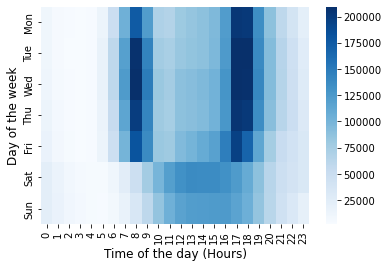

In [20]:
# Usage of bikes per week

def weekday_heatmap(df_sub):
    
    weekdays = ["Mon", "Tue","Wed", "Thu", "Fri", "Sat", "Sun"]
    
    # Data
    
    df_week = df_sub.copy()
    df_week['hour'] = pd.DatetimeIndex(df_week['start_time']).hour
    df_week['weekday'] = pd.DatetimeIndex(df_week['start_time']).weekday
    daily_activity = df_week.groupby(by=['weekday','hour']).count()['start_time'].unstack()

    # Figure
    
    sns.heatmap(daily_activity, robust=True, cmap="Blues", yticklabels=weekdays)

    # Labeling Axes
    
    plt.xlabel("Time of the day (Hours)", fontsize= 12, x = 0.5)
    plt.ylabel("Day of the week", fontsize= 12)


weekday_heatmap(df_sub)

In [29]:
# Find most popular start stations based on start_station_name column

df_sub['start_station_name'].value_counts(dropna = False)

Pershing Square North       114341
E 17 St & Broadway           81226
W 21 St & 6 Ave              79047
Broadway & E 22 St           78958
8 Ave & W 31 St              72330
                             ...  
LPI Facility                     1
58th St Depot                    1
Fairview Ave & Linden St         1
Apache                           1
Centre St & Seneca Ave           1
Name: start_station_name, Length: 1031, dtype: int64

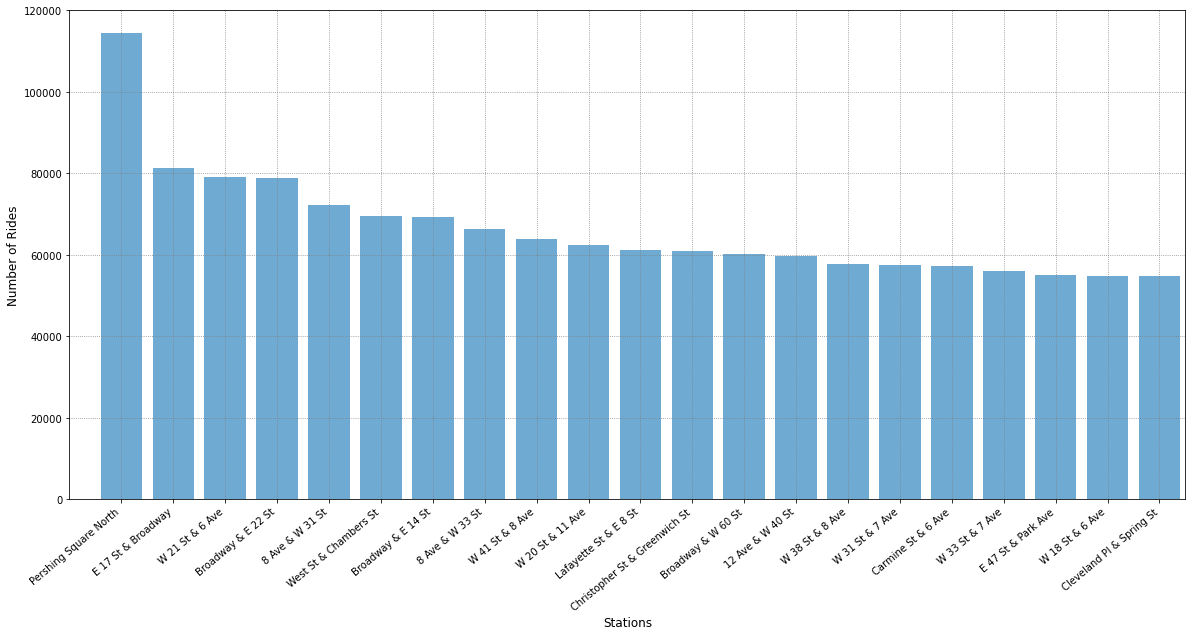

In [34]:
# Most busy bike start stations

def top_dep_stations(df_sub):
    
    # Data
    
    df_dep = df_sub.copy()


    # Figure
    
    fig = plt.figure(figsize=(20,9))
    ax = sns.countplot(x='start_station_name', color = BLUE, data=df_dep, order = df_dep['start_station_name'].value_counts().index)

    # Labeling Axes
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)
    plt.xlim(-1,20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

top_dep_stations(df_sub)

In [39]:
# Find most popular return stations based on end_station_name column

df_sub['end_station_name'].value_counts(dropna = False)

Pershing Square North       105148
E 17 St & Broadway           78485
Broadway & E 22 St           77990
W 21 St & 6 Ave              73758
West St & Chambers St        69043
                             ...  
Washington St                    1
8D QC Station 01                 1
Pathmark Depot                   1
58th St Depot                    1
Fairview Ave & Linden St         1
Name: end_station_name, Length: 1087, dtype: int64

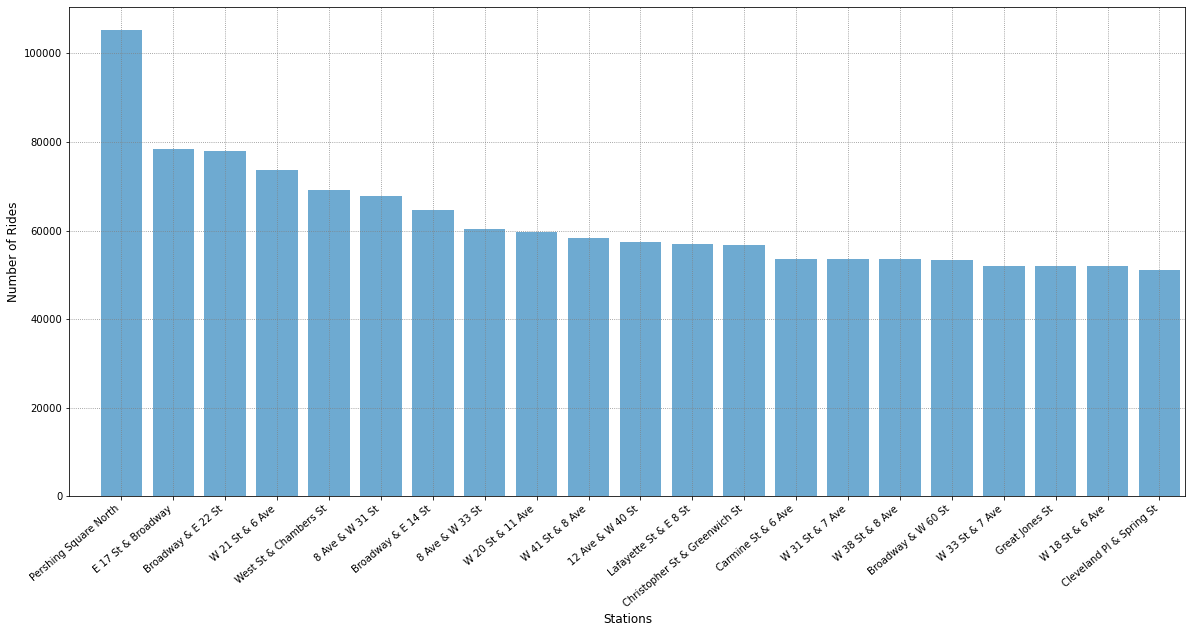

In [40]:
# Most busy bike return stations

def top_arr_stations(df_6):
    
    # Data
    
    # df_arr = df_6.copy()


    # Figure
    
    fig = plt.figure(figsize=(20,9))
    ax = sns.countplot(x='end_station_name', color = BLUE, data=df_arr, order = df_arr['end_station_name'].value_counts().index)

    # Labeling Axes
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)
    plt.xlim(-1,20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

top_arr_stations(df_6)

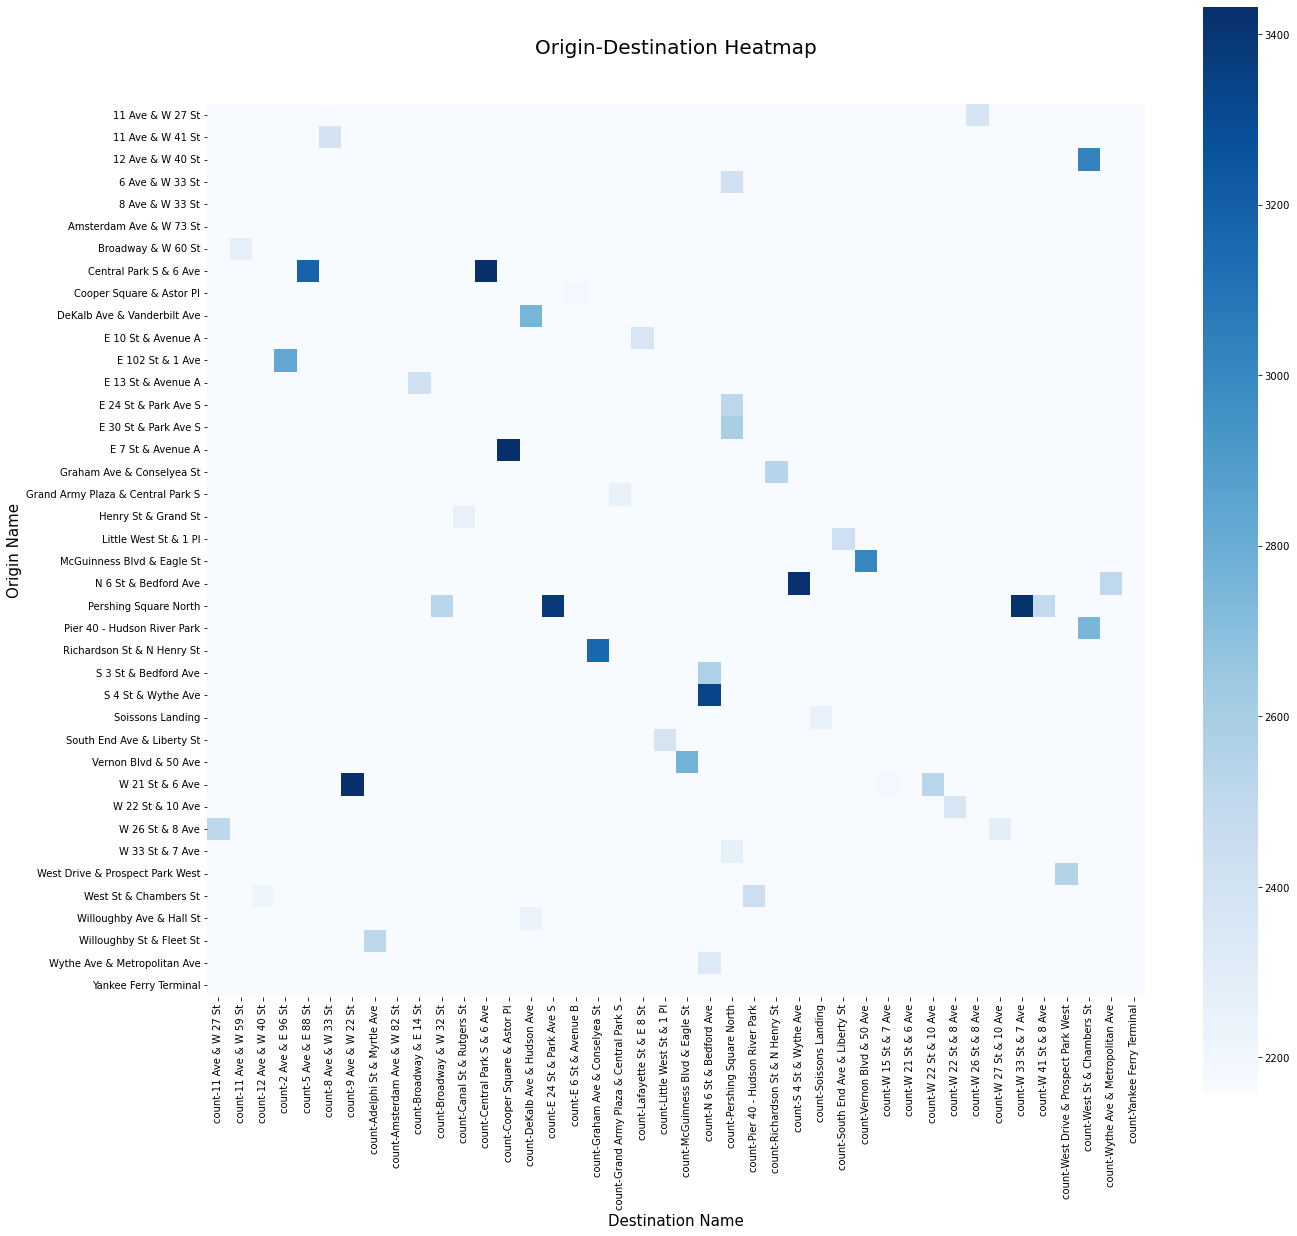

In [35]:
# Most popular trips

def trip_heatmap(df_sub):
    
    # Data
    
    df_trip = df_sub.copy()
    dff = df_trip.groupby(['start_station_name', 'end_station_name']).size()
    dff = dff.sort_values(ascending=False)
    dff = dff.reset_index()
    dff.columns.values[2] = 'count'
    dff = dff[:50]


    # Color scale for heatmap
    
    min_value = dff['count'].quantile(0.05)
    max_value = dff['count'].quantile(0.95)

    # Pivot
    
    dff = dff.pivot_table(index='start_station_name', columns='end_station_name', fill_value=0)
    dff.sort_index(level=0, ascending=True, inplace=True)

    # Figure
    
    fig, ax = plt.subplots(figsize=(21,20))
    sns.heatmap(dff,vmin=min_value,vmax=max_value, cmap='Blues',square=True)
    
    # Labeling
    
    ax.set_title('Origin-Destination Heatmap', fontdict={'fontsize':20}, pad = 50)
    ax.set_xlabel('Destination Name', fontsize= 15, x = 0.5)
    ax.set_ylabel('Origin Name', fontsize= 15)


trip_heatmap(df_sub)

In [36]:
# Distance travelled

def distance_measurement(start_location: pd.Series, end_location: pd.Series) -> pd.Series:
    list_of_distances = []
    for loc1, loc2 in zip(start_location.apply(lambda x: tuple(x)), end_location.apply(lambda x: tuple(x))):
        list_of_distances.append(hs.haversine(loc1, loc2))
    return pd.Series(list_of_distances)

df_sub['route_distance'] = distance_measurement(df_sub['start_station_location'], df_sub['end_station_location'])

In [37]:
df_sub.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,birth_year,gender,hour_of_day,age,trip_type,age_group,start_station_location,end_station_location,route_distance
1352239,4.567,2018-09-22 14:17:15.155,2018-09-22 14:21:49.183,3082.000,Hope St & Union Ave,40.712,-73.951,539.000,Metropolitan Ave & Bedford Ave,40.715,...,Subscriber,1986.000,M,14,32.000,short trip,"[30, 50]","[40.71167351, -73.95141312]","[40.71534825, -73.96024116]",2.640
357674,9.633,2018-12-10 08:44:42.206,2018-12-10 08:54:20.693,523.000,W 38 St & 8 Ave,40.755,-73.991,402.000,Broadway & E 22 St,40.740,...,Subscriber,1974.000,M,8,44.000,average trip,"[30, 50]","[40.75466591, -73.99138152]","[40.7403432, -73.98955109]",2.129
795489,12.900,2018-05-12 18:35:38.000,2018-05-12 18:48:33.000,293.000,Lafayette St & E 8 St,40.730,-73.991,3435.000,Grand St & Elizabeth St,40.719,...,Customer,1999.000,M,18,19.000,average trip,"[18, 30]","[40.73020660529954, -73.99102628231049]","[40.718822, -73.99596]",0.820
1058243,26.017,2017-08-19 09:57:03.000,2017-08-19 10:23:04.000,3419.000,Douglass St & 4 Ave,40.679,-73.982,282.000,Kent Ave & S 11 St,40.708,...,Subscriber,1979.000,F,9,38.000,long trip,"[30, 50]","[40.6792788, -73.98154004]","[40.707644944175705, -73.96841526031494]",0.505
1032691,15.667,2017-06-19 11:23:56.000,2017-06-19 11:39:37.000,3263.000,Cooper Square & E 7 St,40.729,-73.991,387.000,Centre St & Chambers St,40.713,...,Subscriber,1969.000,F,11,48.000,average trip,"[30, 50]","[40.72923649910006, -73.99086803197861]","[40.71273266, -74.0046073]",0.886


In [38]:
# Gender of riders

df_sub['gender'].value_counts(dropna = False)

M      9050734
F      3146570
N/A     660831
Name: gender, dtype: int64

In [39]:
# Age group distribution of riders

df_sub['age_group'].value_counts(dropna = False)

[30, 50]    6654167
[18, 30]    3480315
[50, 70]    2595813
[70+]        103876
[0, 18]       23964
Name: age_group, dtype: int64

Text(0, 0.5, 'count of riders')

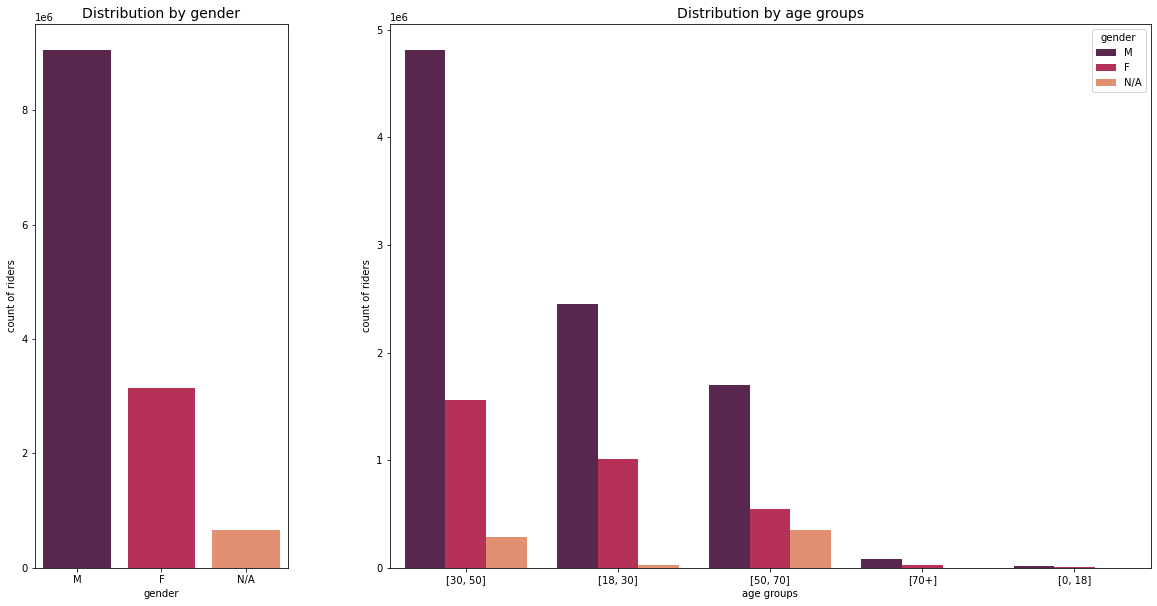

In [40]:
# Visualisations of Gender and Age distribution of Riders

fig, axes = plt.subplots(1, 2, figsize=(20, 10),  gridspec_kw={'width_ratios': [1, 3]})

sns.countplot(ax = axes[0], x='gender', data=df_sub, palette='rocket')
axes[0].set_title('Distribution by gender', size = 14)
axes[0].set_xlabel('gender')
axes[0].set_ylabel('count of riders')

sns.countplot(ax = axes[1], x='age_group', hue = 'gender',  data=df_sub, palette="rocket")
axes[1].set_title('Distribution by age groups', size = 14)
axes[1].set_xlabel('age groups')
axes[1].set_ylabel('count of riders')

In [ ]:
# Combined visualisation of Gender and Age distribution of Riders

plt.figure(figsize=(16,8))
plt.title('Distribution by age')
sns.histplot(data=df_sub, x="age", hue = 'gender', binwidth=1, kde = True)
plt.ylabel('count of riders')

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


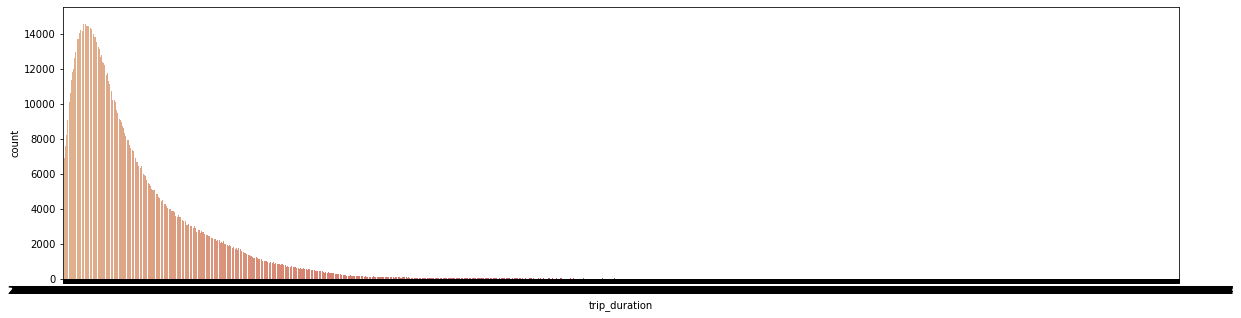

In [48]:
# Visualisation of Trip type by duration

plt.figure(figsize = (20,5))
sns.countplot(df_sub['trip_duration'],palette = 'flare')
plt.show()

In [ ]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150
    
#     m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end_station_latitude"], row["end_station_longitude"]], popup=row["end_station_name"],radius=5, color="Red").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start_station_latitude"], row["end_station_latitude"]],popup=row["start_station_name"]).add_to(map1), axis=1)

In [ ]:
# dataset with start station name, start station location and count of starts
start_trip_info = df_sub.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

start_trip_info['start_station_location'] = df_sub[['start_station_name', 'start_station_location']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_location']

#dataset with end station name, end station location and count of ends
end_trip_info = df_sub.groupby('end_station_name').agg({'end_station_name':'count'}).rename(
    columns={'end_station_name' : 'count_of_ends'}).reset_index().sort_values(by = 'end_station_name')

end_trip_info['end_station_location'] = df_sub[['end_station_name', 'end_station_location']].drop_duplicates(
    subset='end_station_name').sort_values(by='end_station_name').reset_index(drop=True)['end_station_location']
#dataset with station name, station location and sum of starts and ends
count_of_trips_by_stations = end_trip_info.merge(
    start_trip_info.rename(columns={'start_station_name': 'end_station_name'}), how='outer',
    on='end_station_name').rename(columns={'end_station_name': 'station_name'})

In [ ]:
# Sort by data sets by counts and keep top 50 results to use on map

start_trip_info_map = start_trip_info.sort_values(['count_of_starts'],ascending=False).iloc[:50]
end_trip_info_map = end_trip_info.sort_values(['count_of_ends'],ascending=False).iloc[:50]
start_trip_info_map.shape
end_trip_info_map.shape

In [ ]:
# Top 50 map stations which start the trips
map_points_of_start = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in start_trip_info_map.index:
    iframe = folium.IFrame(f'Station:"{start_trip_info_map["start_station_name"][point]}" <br>' 
                           f'Count of started trips:{start_trip_info_map["count_of_starts"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(start_trip_info_map['start_station_location'][point], popup=popup,
    icon=folium.Icon(color='darkblue', icon='bicycle', prefix='fa')).add_to(map_points_of_start)
    
# Top 50 map stations which end the trips
map_points_of_end = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in end_trip_info_map.index:
    iframe = folium.IFrame(f'Station:"{end_trip_info_map["end_station_name"][point]}" <br>' 
                           f'Count of ended trips:{end_trip_info_map["count_of_ends"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(end_trip_info_map['end_station_location'][point], popup=popup,
    icon = folium.Icon(color='green', icon='home')).add_to(map_points_of_end)
    
# create subplots
htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_points_of_start.get_root().render().replace('"', '&quot;'),500,500,
            map_points_of_end.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

In [ ]:
# Top routes

trips_df = pd.DataFrame()
trips_df = df_sub.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of trips')
trips_df = trips_df.sort_values('Number of trips',ascending = False)
trips_df["start_station_name"] = trips_df["start_station_name"].astype(str)
trips_df["end_station_name"] = trips_df["end_station_name"].astype(str)
trips_df["Top routes"] = trips_df["start_station_name"] + " to " + trips_df["end_station_name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

In [ ]:
start_trip_info_map.head()

In [ ]:
end_trip_info_map.head()

In [ ]:
df_sub.shape

In [ ]:
count_of_trips_by_stations.head()

In [42]:
# Export data sets

df_sub.to_csv('df_sub.csv')

In [78]:
start_trip_info.to_csv('df_start_trip_info.csv')

In [79]:
end_trip_info.to_csv('df_end_trip_info.csv')

In [85]:
start_trip_info.to_excel('df_start_trip_info.xlsx')

In [86]:
end_trip_info.to_excel('df_end_trip_info.xlsx')

In [97]:
start_trip_info_map.to_csv('df_start_trip_info_map.csv')
end_trip_info_map.to_csv('df_end_trip_info_map.csv')

In [26]:
df_2017_counts.to_excel('df_2017_counts.xlsx')

In [24]:
df_2018_counts.to_excel('df_2018_counts.xlsx')

In [25]:
df_2019_counts.to_excel('df_2019_counts.xlsx')

In [29]:
# Create a new dataframe. I will use this to calculate the average ridership per hour per day.

df_hourly_trips = df_sub[['start_time','hour_of_day']].copy()

In [32]:
df_hourly_trips

,start_time,hour_of_day,start_date_only,start_time_only
1352239,2018-09-22 14:17:15.155,14,2018-09-22,14:17:15.155000
357674,2018-12-10 08:44:42.206,8,2018-12-10,08:44:42.206000
795489,2018-05-12 18:35:38.000,18,2018-05-12,18:35:38
1058243,2017-08-19 09:57:03.000,9,2017-08-19,09:57:03
1032691,2017-06-19 11:23:56.000,11,2017-06-19,11:23:56
...,...,...,...,...
1046637,2019-04-18 08:58:17.734,8,2019-04-18,08:58:17.734000
1393745,2018-08-23 09:25:53.655,9,2018-08-23,09:25:53.655000
1850315,2018-06-12 19:55:54.106,19,2018-06-12,19:55:54.106000
1787512,2019-06-26 13:06:30.492,13,2019-06-26,13:06:30.492000


In [31]:
df_hourly_trips['start_date_only'] = [d.date() for d in df_hourly_trips['start_time']]
df_hourly_trips['start_time_only'] = [d.time() for d in df_hourly_trips['start_time']]

In [35]:
df_hourly_trips = df_hourly_trips.sort_values(by=["start_date_only", "start_time_only"])

In [36]:
df_hourly_trips_count = df_hourly_trips.groupby(['start_date_only','hour_of_day'])['start_time_only'].count()

In [37]:
# average ridership per hour per day

df_hourly_trips_count

start_date_only  hour_of_day
2017-01-01       0               75
                 1               77
                 2               56
                 3               40
                 4               19
                               ... 
2019-12-31       19             256
                 20             176
                 21             142
                 22             121
                 23             103
Name: start_time_only, Length: 26138, dtype: int64

In [38]:
# Export data sets

df_hourly_trips.to_csv('df_hourly_trips.csv')
df_hourly_trips_count.to_excel('df_hourly_trips_count.xlsx')